In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
from mzsql import *

duckdb_file = "C:/Users/willi/Desktop/180205_Poo_TruePooPos_dda1.duckdb"
sqlite_file = "C:/Users/willi/Desktop/180205_Poo_TruePooPos_dda1.sqlite"
spectrum_idx = 1000
precursor_mz = 118.0865
ppm_acc = 5
fragment_mz = 59.0737
neutral_loss = 59.0128

MS/MS queries involved four relevant queries: 

a single scan extraction by scan number similar to that of the full scan; 

extraction of all the fragments associated with a precursor *m/z* within a given ppm; 

extraction of all fragments with *m/z* values within a given ppm; 

and finally a neutral loss query computed by subtracting the fragment mass from the precursor mass where the difference between the two fell within a specified ppm window around a given *m/z*.

In [ ]:
# turn_mzml_duckdb("C:/Users/willi/Desktop/180205_Poo_TruePooPos_dda1.mzML", "C:/Users/willi/Desktop/180205_Poo_TruePooPos_dda1.sqlite")

<StemContainer object of 3 artists>

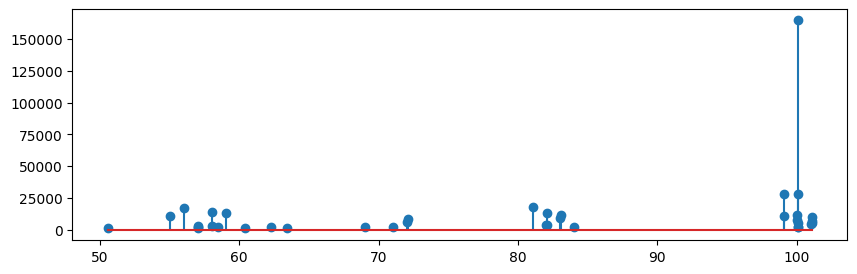

In [4]:
spectrum_data = get_MS2scan_duckdb(duckdb_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])

<StemContainer object of 3 artists>

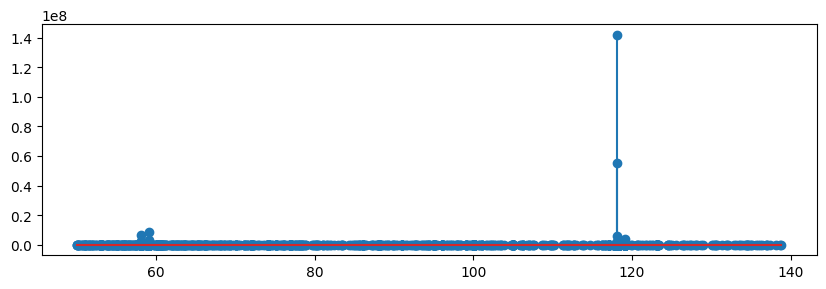

In [4]:
spectrum_data = get_MS2premz_duckdb(duckdb_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])

<StemContainer object of 3 artists>

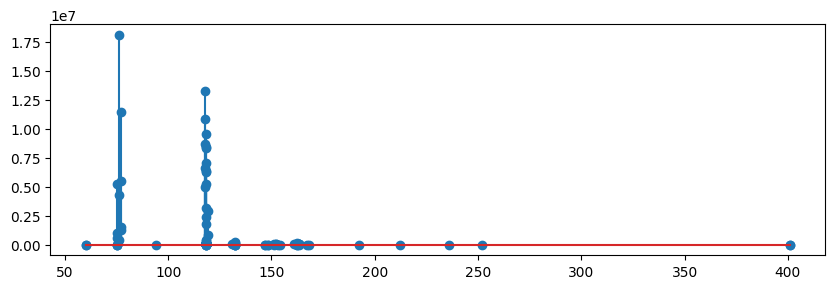

In [6]:
spectrum_data = get_MS2fragmz_duckdb(duckdb_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])

<StemContainer object of 3 artists>

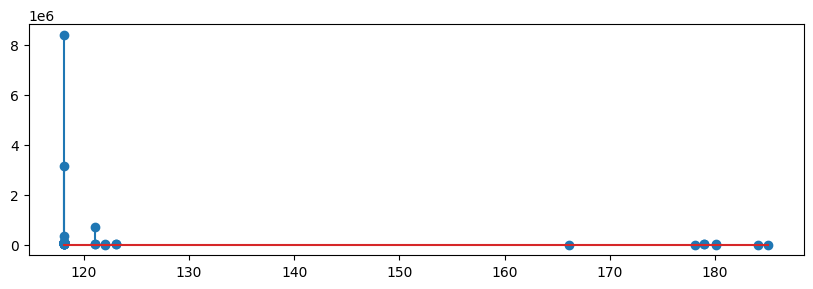

In [8]:
spectrum_data = get_MS2nloss_duckdb(duckdb_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])

In [2]:
# turn_mzml_sqlite("C:/Users/willi/Desktop/180205_Poo_TruePooPos_dda1.mzML", "C:/Users/willi/Desktop/180205_Poo_TruePooPos_dda1.sqlite")

'C:/Users/willi/Desktop/180205_Poo_TruePooPos_dda1.sqlite'

In [10]:
def get_MS2scan_sqlite(file, spectrum_idx):
    conn = sqlite3.connect(file)
    query = f"SELECT * FROM MS2 WHERE id ={spectrum_idx}"
    query_data = pd.read_sql_query(query, conn)
    conn.close()
    return(query_data)

def get_MS2fragmz_sqlite(file, fragment_mz, ppm_acc):
    conn = sqlite3.connect(file)
    mzmin, mzmax = pmppm(fragment_mz, ppm_acc)
    query = f"SELECT * FROM MS2 WHERE fragmz BETWEEN {mzmin} AND {mzmax}"
    query_data = pd.read_sql_query(query, conn)
    conn.close()
    return(query_data)

def get_MS2premz_sqlite(file, precursor_mz, ppm_acc):
    conn = sqlite3.connect(file)
    mzmin, mzmax = pmppm(precursor_mz, ppm_acc)
    query = f"SELECT * FROM MS2 WHERE premz BETWEEN {mzmin} AND {mzmax}"
    query_data = pd.read_sql_query(query, conn)
    conn.close()
    return(query_data)

def get_MS2nloss_sqlite(file, nloss_mz, ppm_acc):
    conn = sqlite3.connect(file)
    mzmin, mzmax = pmppm(nloss_mz, ppm_acc)
    query = f"SELECT * FROM MS2 WHERE premz-fragmz BETWEEN {mzmin} AND {mzmax}"
    query_data = pd.read_sql_query(query, conn)
    conn.close()
    return(query_data)

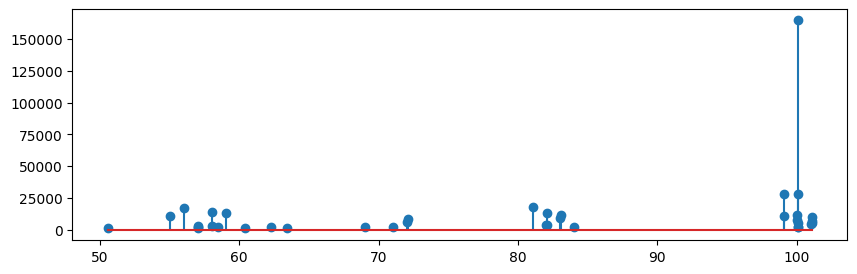

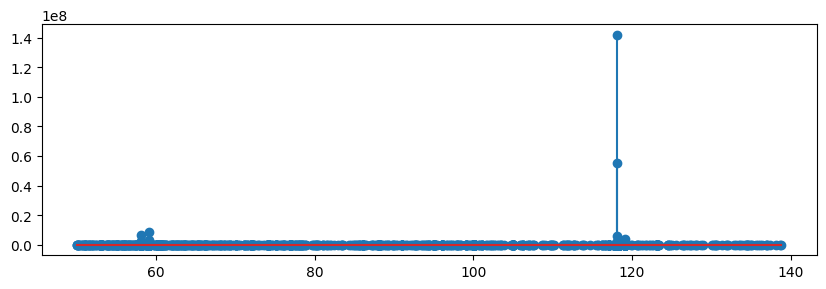

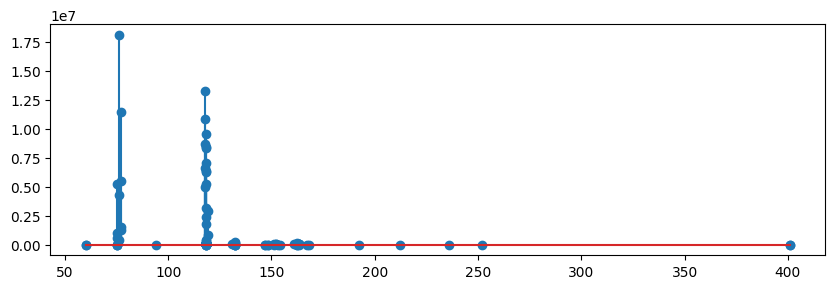

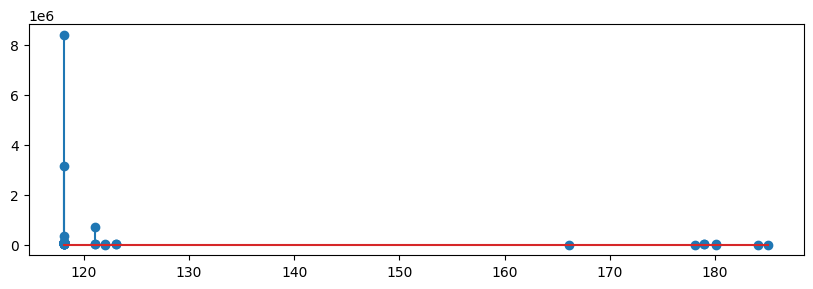

In [14]:
spectrum_data = get_MS2scan_sqlite(sqlite_file, spectrum_idx)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2premz_sqlite(sqlite_file, precursor_mz, ppm_acc)
plt.stem(spectrum_data["fragmz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2fragmz_sqlite(sqlite_file, fragment_mz, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()

spectrum_data = get_MS2nloss_sqlite(sqlite_file, neutral_loss, ppm_acc)
plt.stem(spectrum_data["premz"], spectrum_data["int"])
plt.show()